In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


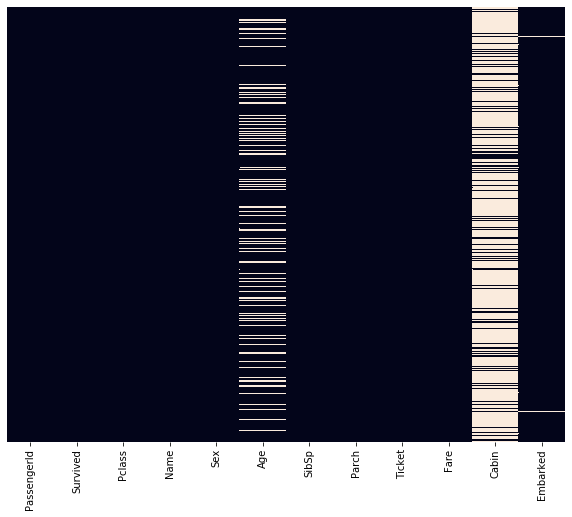

In [34]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),yticklabels=False, cbar=False);

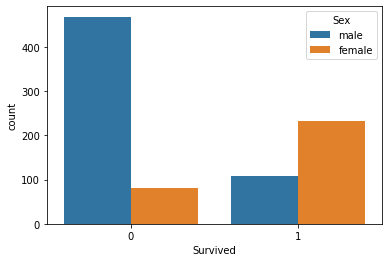

In [35]:
sns.countplot(df["Survived"], hue=df["Sex"]);

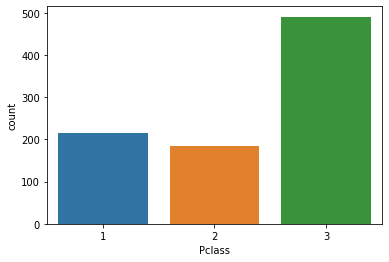

In [36]:
sns.countplot(df["Pclass"]);

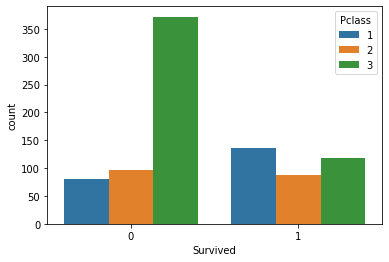

In [37]:
sns.countplot(df["Survived"], hue=df["Pclass"]);

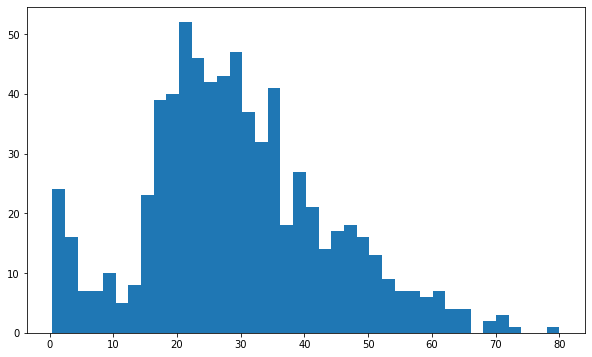

In [38]:
plt.subplots(figsize=(10,6))
plt.hist(df["Age"].dropna(), bins=40);

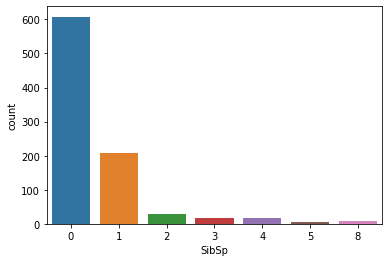

In [39]:
sns.countplot(df["SibSp"]);

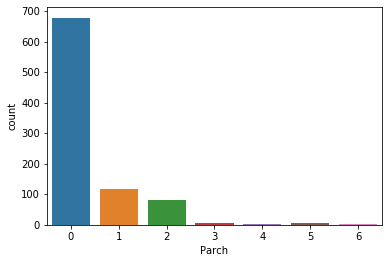

In [40]:
sns.countplot(df["Parch"]);

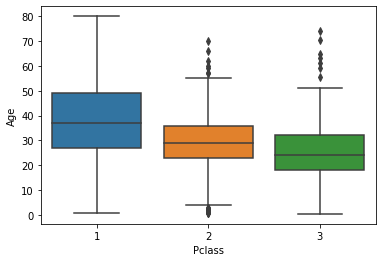

In [41]:
sns.boxplot(df["Pclass"], df["Age"]);

In [42]:
def fill_age(columns):
    Age = columns[0]
    Pclass= columns[1]
    if pd.isna(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 23
    else:
        return Age

In [43]:
df["Age"] = df[["Age", "Pclass"]].apply(fill_age, axis=1)

In [44]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

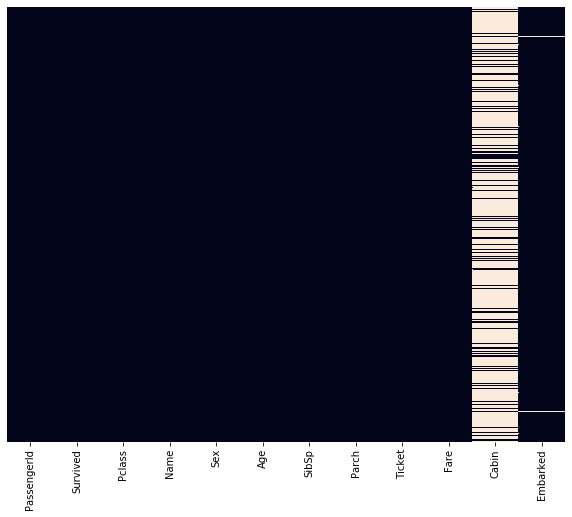

In [45]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),yticklabels=False, cbar=False);

In [46]:
df.drop("Cabin", axis=1, inplace=True)

In [47]:
df.dropna(inplace=True)

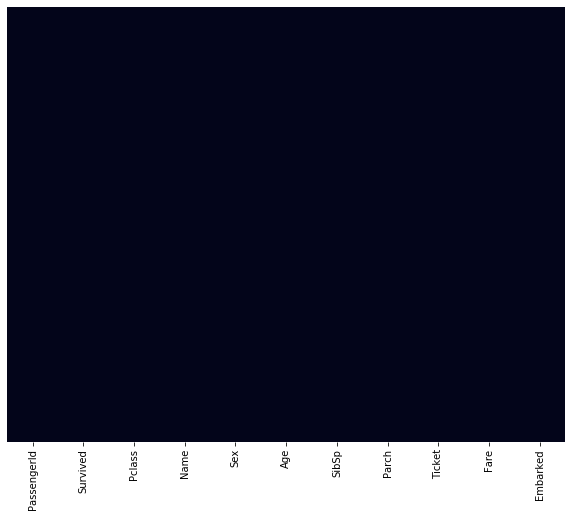

In [48]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isna(),yticklabels=False, cbar=False);

In [49]:
df['male'] = pd.get_dummies(df["Sex"],drop_first=True)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [51]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
embarked = pd.get_dummies(df["Embarked"],drop_first=True)

In [53]:
df = pd.concat([df,embarked],axis=1)

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [56]:
df.drop(["Sex","Ticket","Embarked","Name"], axis=1, inplace=True)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,23.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [59]:
df.drop(["PassengerId"], axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [74]:
model = {"LogisticRegression":LogisticRegression(max_iter=1000),
         "RandomForestClassifier":RandomForestClassifier(),
         "LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier()}

result={}

In [75]:
for model_name, model in model.items():
    model.fit(X_train, y_train)
    result[model_name] = model.score(X_test, y_test)
result

C:\Users\Abhishek\Desktop\Project\evn\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'LogisticRegression': 0.8033707865168539,
 'RandomForestClassifier': 0.7528089887640449,
 'LinearSVC': 0.8033707865168539,
 'KNN': 0.7134831460674157}

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
y_preds = model.predict(X_test)

In [80]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [81]:
confusion_matrix(y_test, y_preds)

array([[89, 20],
       [15, 54]], dtype=int64)